In [8]:
# package imports
import warnings
warnings.filterwarnings('ignore')
import gc
import math
import pandas as pd
import numpy as np 
import shap
import lightgbm as lgb
from lightgbm import plot_importance

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.model_selection import train_test_split

# 相关全局设置
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None)


sns.set()

np.random.seed(2020)

In [9]:
X,y = shap.datasets.adult()
X_display,y_display = shap.datasets.adult(display=True)

# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test)

In [10]:
params = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}

model = lgb.train(params, d_train, 10000, valid_sets=[d_test], early_stopping_rounds=50, verbose_eval=1000)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[683]	valid_0's binary_logloss: 0.277144


In [12]:
y_pred = model.predict(X_test)
y_pred[:10]

array([3.96737035e-02, 6.55655516e-01, 4.57593762e-02, 1.21778216e-02,
       3.81061808e-01, 1.81371779e-01, 4.10484757e-02, 3.51057790e-01,
       2.02339139e-04, 9.99959197e-01])

In [13]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
# shap_values.shape()

AttributeError: 'list' object has no attribute 'shape'

In [23]:
type(shap_values[1])
shap_values[1].shape

numpy.ndarray

(32561, 12)

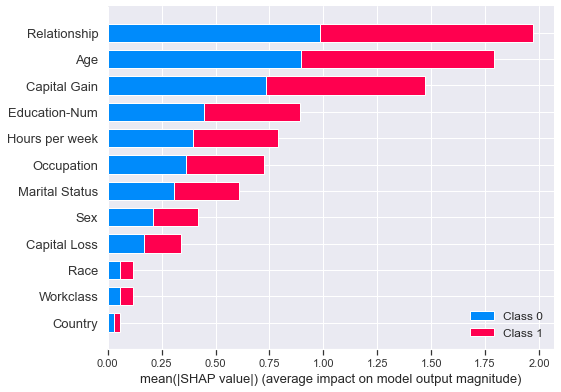

In [14]:
shap.summary_plot(shap_values, X)

# 读取数据

## 只读取部分数据

In [ ]:
df = pd.read_csv('big_data.csv', skiprows = lambda x: x > 0 and np.random.rand() > 0.01)

print('it has been reduced 100 times')

## 减少不必要的数据内存
读取数据后使用一次，在数据进入模型训练前，再使用一次

In [3]:
%%time
#这个前面用
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem/(1024*1024)))
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    for col in df.columns:
        col_type = df[col].dtype
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if pd.isnull(c_min) or pd.isnull(c_max):
                continue
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem/(1024*1024)))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df


#这个只能最后一步用，因为有些数据处理不接受category
def reduce_mem_usage1(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem/(1024*1024)))
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    for col in df.columns:
        col_type = df[col].dtype
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem/(1024*1024)))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 28.8 µs


# EDA

## label分布分析

## 类别特征分析

In [ ]:
for col in cate_cols:
    col
    data_train[col].value_counts()

In [ ]:
#对某一列计数
sns.catplot(x="deck", kind="count", data=titanic);

## 异常值和缺失值

缺失值在info就可以看到

In [ ]:
#通过箱线图查看异常值
for col in df_train.columns:
    plt.figure()
    sns.violinplot(df_train[col])

## 特征之间相关性

In [ ]:
sns.pairplot(iris);

train_df.corr()

# 特征工程

## 数据清洗

### 缺失值

In [ ]:
data[feature].fillna('unknown', inplace = True)

### 异常值

In [ ]:
# 这里我包装了一个异常值处理的代码，可以随便调用。
def outliers_proc(data, col_name, scale=3):
    """
    用于清洗异常值，默认用 box_plot（scale=3）进行清洗
    :param data: 接收 pandas 数据格式
    :param col_name: pandas 列名
    :param scale: 尺度
    :return:
    """

    def box_plot_outliers(data_ser, box_scale):
        """
        利用箱线图去除异常值
        :param data_ser: 接收 pandas.Series 数据格式
        :param box_scale: 箱线图尺度，
        :return:
        """
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up)
        return (rule_low, rule_up), (val_low, val_up)

    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print("Delete number is: {}".format(len(index)))
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
    print("Now column number is: {}".format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the upper bound is:")
    print(pd.Series(outliers).describe())
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
    sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
    return data_n

## 特征构造

In [6]:
# 以groupBy构造统计量
def groupby_feature(col, target):
    Train_gb = data_train.groupby(col)
    all_info = {}
    for kind, kind_data in Train_gb:
        info = {}
        kind_data = kind_data[kind_data[target] > 0]
#         info[col+'_amount'] = len(kind_data)
        info[col + '_' + target +'_max'] = kind_data[target].max()
        info[col + '_' + target +'_median'] = kind_data[target].median()
        info[col + '_' + target +'_min'] = kind_data[target].min()
        info[col + '_' + target +'_sum'] = kind_data[target].sum()
        info[col + '_' + target +'_std'] = kind_data[target].std()
        info[col + '_' + target +'_average'] = round(kind_data[target].sum() / (len(kind_data) + 1), 2)
        all_info[kind] = info
    brand_fe = pd.DataFrame(all_info).T.reset_index().rename(columns={'index': col})
    return data.merge(brand_fe, how='left', on=col)

# 模型

## 模型选择

### LightGBM

1. https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
2. https://mathpretty.com/10649.html
3. https://blog.csdn.net/u012735708/article/details/83749703

In [7]:



lgb_train_data = lgb.Dataset(x_train, y_train, silent=True)

params = { 
    #一般固定的参数
    'objective': 'regression_l1', #=mae
    'metric': 'mae',
#     'categorical_feature': cate_feature,
    'bagging_fraction': 0.8, # 数据采样
    'feature_fraction': 0.8, # 特征采样

    'verbosity': 1, #< 0: Fatal, = 0: Error (Warning), = 1: Info, > 1: Debug
    'nthread' : 8,
    
    #调参一般改动的参数
    'lambda_l1': 0,
    'lambda_l2': 0,
    'min_gain_to_split': 0.0,
    
    'learning_rate': 0.05, 
    'num_iterations' : 5000,
    
    'max_depth': 10,
    'num_leaves': 100, #不要超过2^max_depth
    
    'max_bin': 255,
    'seed': 2020,  #保证每次训练随机部分相同
    'verbose': -1, #只打印错误信息
    
    }

# 当train里面的参数与params里面的参数重复时，以params的为准
# 若传入的数据是Dataframe，则会自动识别cat数据。或者自定义cat数据，然后指定为categorical_feature
model = lgb.train(params, data = lgb_train_data, valid = [lgb_train_data,lgb_val_data], categorical_feature=cate_feature , verbose_eval=500, early_stopping_rounds = 50)

# cv
cv_results = lgb.cv(params, lgb_data_train, shuffle=True, early_stopping_rounds=50, verbose_eval=100, show_stdv=True)

# 特征权重分析
lgb.plot_importance(model)

#预测
y_pred = gbm.predict(x_test, num_iteration=model.best_iteration)

NameError: name 'x_train' is not defined

#### 自定义函数

In [ ]:
# 40-50次训练
# 自定义目标函数
def loglikelihood(preds, train_data):
    labels = train_data.get_label()
    preds = 1. / (1. + np.exp(-preds))
    grad = preds - labels
    hess = preds * (1. - preds)
    return grad, hess
# 自定义评估函数
def binary_error(preds, train_data):
    labels = train_data.get_label()
    return 'error', np.mean(labels != (preds > 0.5)), False

gbm = lgb.train(params,
               lgb_train,
                valid_sets=lgb_eval,
               fobj=loglikelihood, # 自定义目标函数
               feval=binary_error, # 自定义评估函数
               )

### CatBoost

## 模型验证

### 交叉验证

### Time Series交叉验证

## 模型分析

### 学习曲线learning curve

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_absolute_error

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, score=None, n_jobs=1, 
                        train_sizes=np.linspace(0.1, 1.0, 5), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为5份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=score, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel('trian number')
        plt.ylabel('score')
        plt.gca().invert_yaxis()
        plt.grid(True)
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label='train score')
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label='test score')
    
        plt.legend(loc='best')
        
        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

## 模型调参

### GridSearch

In [ ]:
parameters = {
              'max_depth': [15, 20, 25, 30, 35],
              'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15],
              'feature_fraction': [0.6, 0.7, 0.8, 0.9, 0.95],
              'bagging_fraction': [0.6, 0.7, 0.8, 0.9, 0.95],
              'bagging_freq': [2, 4, 5, 6, 8],
              'lambda_l1': [0, 0.1, 0.4, 0.5, 0.6],
              'lambda_l2': [0, 10, 15, 35, 40],
              'cat_smooth': [1, 10, 15, 20, 35]
}
gbm = lgb.LGBMClassifier(boosting_type='gbdt',
                         objective = 'binary',
                         metric = 'auc',
                         verbose = 0,
                         learning_rate = 0.01,
                         num_leaves = 35,
                         feature_fraction=0.8,
                         bagging_fraction= 0.9,
                         bagging_freq= 8,
                         lambda_l1= 0.6,
                         lambda_l2= 0)
# 有了gridsearch我们便不需要fit函数
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='accuracy', cv=3)
gsearch.fit(train_x, train_y)

print("Best score: %0.3f" % gsearch.best_score_)
print("Best parameters set:")
best_parameters = gsearch.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

### 贝叶斯调参

下面以lgb为例子

In [ ]:
from bayes_opt import BayesianOptimization

def lgb_cv(feature_fraction,bagging_fraction,min_data_in_leaf,max_depth,min_split_gain,num_leaves,lambda_l1,lambda_l2,num_iterations=1000):
        params = {'objective': 'regression_l1','num_iterations': num_iterations, 'early_stopping_round':50}
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params["min_data_in_leaf"] = int(round(min_data_in_leaf))
        params['max_depth'] = int(round(max_depth))
        params['min_split_gain'] = min_split_gain      
        params["num_leaves"] = int(round(num_leaves))
        params['lambda_l1'] = max(lambda_l1, 0)
        params['lambda_l2'] = max(lambda_l2, 0)
        
        cv_result = lgb.cv(params, lgb_data_train, nfold=5, seed=2, stratified=False)
        return -(min(cv_result['l1-mean']))

lgb_opt = BayesianOptimization(
        lgb_cv,
        {'feature_fraction': (0.5, 1),
        'bagging_fraction': (0.5, 1),
        'min_data_in_leaf': (1,100),
        'max_depth': (6, 15),
         'min_split_gain': (0, 5),
         'num_leaves': (50, 128),
         'lambda_l1': (0, 100),
         'lambda_l2': (0, 100)}
    )        

lgb_opt.maximize(init_points=21,n_iter=90) #init_points表示初始点，n_iter代表迭代次数（即采样数）

## 模型融合

### stacking

In [ ]:
from sklearn.ensemble import StackingRegressor

models=[
    ('lgb', model = LGBMRegressor(num_leaves=100,
                          max_depth=10,
                          learning_rate=0.05,
                          n_estimators=5000,
                          bagging_fraction=0.8,
                          feature_fraction=0.8,
                          random_state=15,
                          metric='mae',
                          )),
    ('log_clf', LogisticRegression()),
    ('svm_clf', SVC(probability=True)),
    ('rf_clf', RandomForestClassifier()),
    ('gbdt_clf', GradientBoostingClassifier())
]


model = StackingClassifier(estimators=models, final_estimator=LogisticRegression())

# 提交结果

In [ ]:
sub = pd.DataFrame()
sub['SaleID'] = data_testA['SaleID']
sub['price'] = result
sub.to_csv('submission.csv',index=False)

# magic command

In [5]:
%%time

num = []

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
